# Usage

`decoupler` contains different statistical methods to infer enrichment scores from omics data using prior knowledge. In this notebook we showcase how to use it with some toy data.

decouplerには、事前知識を用いてオミックスデータからエンリッチメントスコアを推測するための様々な統計的手法が含まれている。このノートブックでは、おもちゃのデータを使った使い方を紹介する。

## Loading packages

`decoupler` can be imported as:

In [1]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
import decoupler as dc

## Loading toy data

`decoupler` needs a matrix (`mat`) of molecular readouts (gene expression, logFC, p-values, etc.) and a network (`net`) that relates target features (genes, proteins, etc.) to "source" biological entities (pathways, transcription factors, molecular processes, etc.)

To load the example data-set, simply run:

decouplerが必要とするのは、分子の読み出し値（遺伝子発現、logFC、p値など）のマトリックス（mat）と、ターゲットの特徴（遺伝子、タンパク質など）を「ソース」生物学的実体（パスウェイ、転写因子、分子プロセスなど）に関連付けるネットワーク（net）である。

サンプルのデータセットを読み込むには、次のように実行するだけでよい：

In [4]:
mat, net = dc.get_toy_data()

In [9]:
mat.head()

,G01,G02,G03,G04,G05,G06,G07,G08,G09,G10,G11,G12
S01,8.304717,9.039984,8.750451,8.940565,1.951035,1.302180,0.127840,0.316243,0.016801,0.853044,0.879398,0.777792
S02,8.066031,9.127241,8.467509,8.859292,0.368751,0.958883,0.878450,0.049926,0.184862,0.680930,1.222541,0.154529
S03,8.428328,8.352134,8.532309,8.365444,0.412733,0.430821,2.141648,0.406415,0.512243,0.813773,0.615979,1.128972
S04,8.113947,8.840156,8.824481,8.650593,0.743254,0.543154,0.665510,0.232161,0.116686,0.218689,0.871429,0.223596
S05,8.678914,8.067579,8.289119,8.631288,1.457156,0.319671,0.470373,0.638878,0.275142,1.494941,0.865831,0.968278


In [10]:
net.head()

,source,target,weight
0,T1,G01,1.0
1,T1,G02,1.0
2,T1,G03,0.7
3,T2,G04,1.0
4,T2,G06,-0.5


This example consists of two small populations of samples (S, rows) with different gene expression patterns (G, columns):

この例は、異なる遺伝子発現パターン（G、列）を持つ2つの小さなサンプル集団（S、行）からなる：

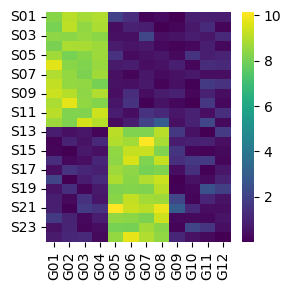

In [33]:
fig, ax = plt.subplots(
    1, 1, figsize=(3, 3), tight_layout=True, sharey=True
)

sns.heatmap(mat, cmap='viridis', ax=ax)

plt.show()

Here we can see that some genes seem to be more expressed in one group of samples than in the other and vice-versa. Ideally, we would like to capture these differences in gene programs into interpretable biological entities. In this example we will do it by summarizing gene expression into transcription factor activities.

The toy data also contains a simple `net` consisting of 5 transcription factors (Ts) with specific regulation to target genes (Gs), either positive or negative:

ここで、ある遺伝子はあるサンプル群では他のサンプル群よりも発現量が多く、またその逆もあることがわかる。理想的には、このような遺伝子プログラムの違いを、解釈可能な生物学的実体としてとらえたい。この例では、遺伝子発現を転写因子活性に要約することでそれを実現する。

このおもちゃのデータには、5つの転写因子（Ts）からなる単純なネットが含まれており、標的遺伝子（Gs）に対して正または負のどちらかの特異的な制御が行われている：

In [8]:
net

,source,target,weight
0,T1,G01,1.0
1,T1,G02,1.0
2,T1,G03,0.7
3,T2,G04,1.0
4,T2,G06,-0.5
5,T2,G07,-3.0
6,T2,G08,-1.0
7,T3,G06,1.0
8,T3,G07,0.5
9,T3,G08,1.0


This network can be visualized like a graph. Green edges are positive regulation (activation), red edges are negative regulation (inactivation):

このネットワークはグラフのように視覚化できる。緑のエッジは正の調節（活性化）、赤のエッジは負の調節（不活性化）である：

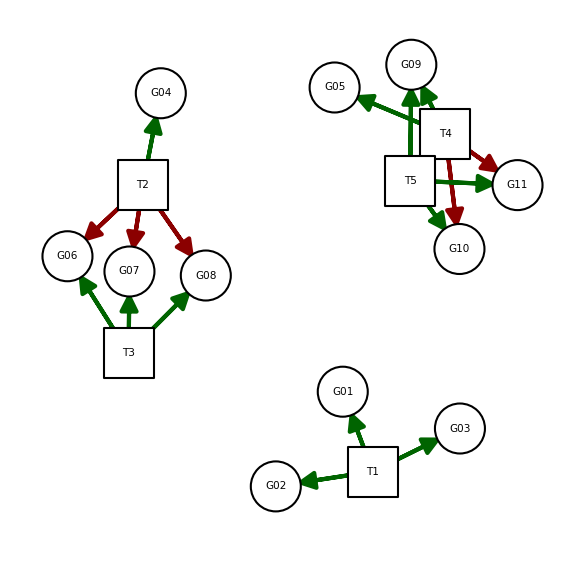

In [11]:
dc.plot_network(
    net,
    node_size=50,
    figsize=(4, 4),
    s_cmap='white',
    t_cmap='white',
    c_pos_w='darkgreen',
    c_neg_w='darkred'
)

According to this network, the first population of samples should show high activity for T1 and T2, while the second one for T3 and T4. T5 should have no activity in all samples.

このネットワークによると、最初のサンプル集団はT1とT2に高い活性を示し、2番目のサンプル集団はT3とT4に高い活性を示すはずである。T5はすべてのサンプルで活性がないはずである。

## Methods

`decoupler` contains several methods. To check how many are available, run:

decouplerにはいくつかのメソッドがある。使用可能なメソッドの数を確認するには、以下を実行する：

In [12]:
dc.show_methods()

,Function,Name
0,run_aucell,AUCell.
1,run_consensus,Consensus score from top methods.
2,run_gsea,Gene Set Enrichment Analysis (GSEA).
3,run_gsva,Gene Set Variation Analysis (GSVA).
4,run_mdt,Multivariate Decision Tree (MDT).
5,run_mlm,Multivariate Linear Model (MLM).
6,run_ora,Over Representation Analysis (ORA).
7,run_udt,Univariate Decision Tree (UDT).
8,run_ulm,Univariate Linear Model (ULM).
9,run_viper,Virtual Inference of Protein-activity by Enric...


Each method models biological activities in a different manner, sometimes returning more than one estimate or providing significance of the estimation. To know what each method returns, please check their documentation like this `?run_mlm`.

To have a unified framework, methods inside `decoupler` have these shared arguments:

* `mat` : input matrix of molecular readouts.
* `net` : input prior knowledge information relating molecular features to biological entities.
* `source`,`target` and `weight` : column names where to extract the information from `net`. 
    * `source` refers to the biological entities.
    * `target` refers to the molecular features.
    * `weight` refers to the "strength" of the interaction (if available, else 1s will be used). Only available for methods that can model interaction weights.
* `min_n` : Minimum of target features per biological entity (5 by default). If less, sources are removed. This filtering prevents obtaining noisy activities from biological entities with very few matching target features in `mat`. For this example data-set we will have to keep it to 0 though.
* `verbose` : Whether to show progress.
* `use_raw` : When the input is an `AnnData` object, whether to use the data stored in it's `.raw` atribute or not (`True` by default).

各手法は異なる方法で生物学的活動をモデル化し、時には複数の推定値を返したり、推定値の有意性を示したりする。各メソッドが何を返すかを知るには、このようなドキュメントをチェックしてほしい。

統一されたフレームワークを持つために、decouplerの中のメソッドは以下の引数を共有している：

* mat : 分子の読み取り値の入力行列。
* net : 分子の特徴と生物学的実体を関連付ける事前知識情報の入力。
* source、target、weight : netから情報を抽出する列名。
    * sourceは生物学的実体を指す。
    * targetは分子の特徴を指す。
    * weightは相互作用の強さを示す（利用可能な場合、それ以外は1が使用される）。相互作用の重みをモデル化できるメソッドでのみ利用可能。
* min_n : 生物学的実体ごとのtarget featuresの最小値（デフォルトは5）。それ以下の場合、ソースは削除される。このフィルタリングにより、matに一致するターゲット特徴がほとんどない生物学的実体から、ノイズの多いアクティビティが得られるのを防ぐことができる。このサンプルのデータセットでは、0にしておく必要がある。
* verbose : 進捗を表示するかどうか。
* use_raw : 入力が AnnData オブジェクトの場合、.raw 属性に格納されているデータを使用するかどうか（デフォルトは True）。

## Running methods

### Individual methods

As an example, let's first run the Gene Set Enrichment Analysis method (`gsea`), one of the most well-known statistics:

例として、最もよく知られた統計の一つである遺伝子セット濃縮解析法（gsea）をまず実行してみよう：

In [13]:
# For this toy data, we need to set min_n to 0 (otherwise it is better to keep at 5):
acts, norm_acts, pvals = dc.run_gsea(mat, net, min_n=0, times=100)

In [14]:
acts.head()

source,T1,T2,T3,T4,T5
S01,0.888889,0.711597,-0.555556,-0.50,-0.666667
S02,0.888889,0.699385,-0.555556,-0.50,-0.444444
S03,0.888889,0.551198,-0.444444,-0.75,-0.666667
S04,0.888889,0.607223,-0.666667,-0.50,-0.444444
S05,0.888889,0.732963,-0.888889,-0.50,-0.444444


In [17]:
norm_acts.head()

source,T1,T2,T3,T4,T5
S01,1.234678,1.011988,-1.018518,-0.825397,-1.096154
S02,1.202222,0.929855,-0.967742,-0.780488,-0.732824
S03,1.216594,0.776507,-0.711656,-1.200000,-1.086207
S04,1.157576,0.820708,-1.100000,-0.800000,-0.759124
S05,1.254691,1.049219,-1.518248,-0.876712,-0.724409


In [18]:
pvals.head()

source,T1,T2,T3,T4,T5
S01,0.144737,0.426966,0.454545,1.000000,0.421053
S02,0.144737,0.717647,0.666667,1.000000,1.000000
S03,0.062500,0.850000,1.000000,0.272727,0.380952
S04,0.125000,0.873563,0.363636,1.000000,1.000000
S05,0.120000,0.360465,0.076923,0.875000,1.000000


In the case of `gsea`, it returns a simple estimate of activities (`acts`), a normalised estimate (`norm_acts`) and `pvals` data-frames after doing permutations.

Let us plot the obtained results:

gseaの場合、単純なアクティビティ推定値（acts）、正規化推定値（norm_acts）、並べ替え後のpvalsデータフレームを返す。

得られた結果をプロットしてみよう：

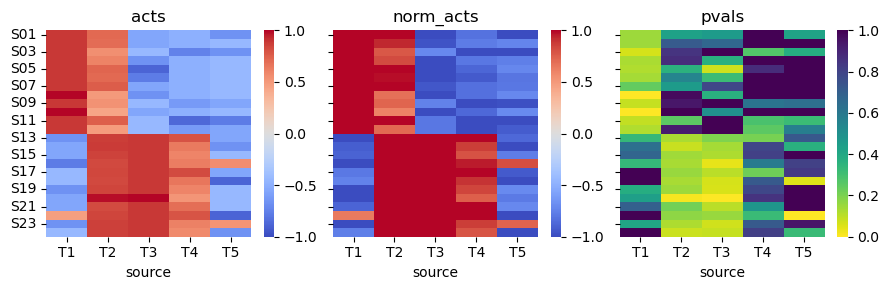

In [15]:
fig, axes = plt.subplots(
    1, 3, figsize=(9, 3), tight_layout=True, sharey=True
)

axes[0].set_title('acts')
sns.heatmap(acts, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])

axes[1].set_title('norm_acts')
sns.heatmap(norm_acts, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])

axes[2].set_title('pvals')
sns.heatmap(pvals, cmap='viridis_r', ax=axes[2], vmax=1)

plt.show()

We can observe that for transcription factors T1 and T3, the obtained activities correctly distinguish the two sample populations. T2, on the other hand, should be down for the second population of samples since it is a repressor. This mislabeling of activities happens because `gsea` cannot model weights when inferring biological activities.

When weights are available in the prior knowledge, we definitely recommend using any of the methods that take them into account to get better estimates, one example is the Univariate Linear Model method `ulm`:

転写因子T1とT3については、得られた活性が2つのサンプル集団を正しく区別していることが観察できる。一方、T2は抑制因子であるため、2つ目のサンプル集団では減少しているはずである。gseaは生物学的活性を推論する際に重みをモデル化することができないため、このような誤ったラベル付けが起こります。

事前知識で重みが利用可能な場合、より良い推定値を得るために、重みを考慮した方法を使用することをお勧めします：

In [19]:
# For this toy data, we need to set min_n to 0 (otherwise it is better to keep at 5):
acts, pvals = dc.run_ulm(mat, net, min_n=0)

In [20]:
acts.head()

,T1,T2,T3,T4,T5
S01,4.020366,1.667426,-1.378734,-0.243605,-1.188727
S02,4.060297,1.392356,-1.313069,-0.387175,-1.102454
S03,4.189780,1.086979,-1.346471,-0.294281,-1.139018
S04,4.149536,1.395950,-1.332407,-0.273508,-1.197696
S05,4.052075,1.610522,-1.534533,-0.311155,-0.990895


In [21]:
pvals.head()

,T1,T2,T3,T4,T5
S01,0.002437,0.126394,0.198034,0.812462,0.262009
S02,0.002285,0.193999,0.218491,0.706739,0.296089
S03,0.001859,0.302552,0.207875,0.774561,0.281246
S04,0.001981,0.192946,0.212291,0.790029,0.258653
S05,0.002316,0.138361,0.155908,0.762072,0.345107


In this case, `ulm` only returns infered activities and their associated p-value.

As before, let us plot the resulting activities:

この場合、ulmは推論されたアクティビティと関連するp値のみを返す。

前回と同様に、結果のアクティビティをプロットしてみよう：

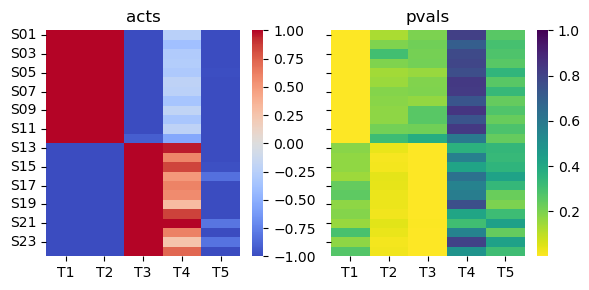

In [22]:
fig, axes = plt.subplots(1,2, figsize=(6,3), tight_layout=True, sharey=True)

axes[0].set_title('acts')
sns.heatmap(acts, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])

axes[1].set_title('pvals')
sns.heatmap(pvals, cmap='viridis_r', ax=axes[1], vmax=1)

plt.show()

Since `ulm` models weights when estimating biological activities, it correctly assigns T2 as inactive in the second population of samples.

ulmは生物学的活性を推定する際に重みをモデル化するため、2番目のサンプルの母集団ではT2を不活性と正しく割り当てている。

### Multiple methods

`decoupler` also allows to run multiple methods at the same time. Moreover, it computes a consensus score based on the obtained activities across methods, called `consensus`.

By default, `decouple` runs only the top performer methods in our benchmark (`mlm`, `ulm` and `wsum`), and estimates a consensus score across them. Specific arguments to specific methods can be passed using the variable `args`. For more information check `?decouple`. If we wanted to only obtain the consensus score, we could also have used `run_consensus`, check `?run_consensus` for more information.

decouplerは、複数のメソッドを同時に実行することもできる。さらに、コンセンサスと呼ばれる、手法間で得られたアクティビティに基づくコンセンサススコアを計算する。

デフォルトでは、decoupleはベンチマークのトップパフォーマーのメソッド（mlm、ulm、wsum）のみを実行し、それら全体のコンセンサススコアを推定する。特定のメソッドへの引数は、変数 args を使って渡すことができる。詳細は ?decouple を参照。コンセンサススコアだけを取得したい場合は、run_consensusを使うこともできます。

In [23]:
# For this toy data, we need to set min_n to 0 (otherwise it is better to keep at 5):
results = dc.decouple(mat, net, min_n=0, verbose=False)

In [30]:
results.keys()

dict_keys(['mlm_estimate', 'mlm_pvals', 'ulm_estimate', 'ulm_pvals', 'wsum_estimate', 'wsum_norm', 'wsum_corr', 'wsum_pvals', 'consensus_estimate', 'consensus_pvals'])

`decouple` either returns a dictionary of activities and p-values, or stores them in the `AnnData` instance provided. 

Let us see how the consensus score looks like:

decoupleは、アクティビティとp値の辞書を返すか、提供されたAnnDataインスタンスに格納します。

コンセンサス・スコアがどのように見えるか見てみよう：

In [31]:
# Extract from dictionary
acts = results['consensus_estimate']
pvals = results['consensus_pvals']

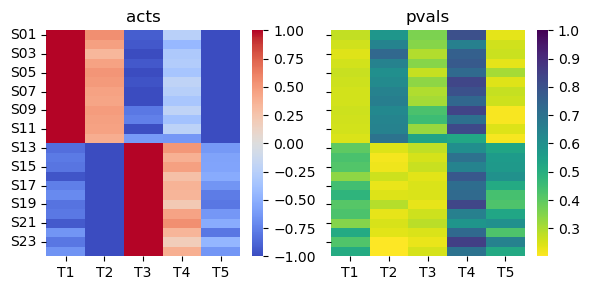

In [32]:
fig, axes = plt.subplots(1,2, figsize=(6,3), tight_layout=True, sharey=True)

axes[0].set_title('acts')
sns.heatmap(acts, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])

axes[1].set_title('pvals')
sns.heatmap(pvals, cmap='viridis_r', ax=axes[1], vmax=1)

plt.show()

We can observe that the consensus score correctly predicts that T1 and T2 should be active in the first population of samples while T3 and T4 in the second one. T5 is inactive everywhere as expected.

コンセンサス・スコアは、T1とT2が最初のサンプル集団で活性化し、T3とT4が2番目のサンプル集団で活性化することを正しく予測していることがわかる。T5は予想通りどこでも不活性である。